**Advanced Deep Learning 2023**

**Exercise 5**

**Juuso Paakkunainen 70579167**

Implementation of image data augmentation:
1. Construct your own convolutional neural network, train the network with CIFAR10 dataset, then
test the classification result of the implementation of horizontal and vertical flip augmentation
technique on “dog.jpg” image.
CIFAR10 database link: https://www.cs.toronto.edu/~kriz/cifar.html
2. Construct your own convolutional neural network, train the network with MNIST dataset, then test
the classification result of the implementation of rotation augmentation technique on
“handwritten6.jpg” image.
MNIST database link: http://yann.lecun.com/exdb/mnist/

In [ ]:
# Imports

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
# Defining variables

learning_rate = 0.001
momentum = 0.95

In [ ]:
def elu(x, alpha=1.0):
    return tf.where(x > 0, x, alpha * (tf.exp(x) - 1))

def tanh(x):
    return tf.tanh(x)

In [ ]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label

Loading the MNIST dataset and normalizing the pictures

In [ ]:
# Load and preprocess the MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
x_train_mnist, x_test_mnist = x_train_mnist / 255.0, x_test_mnist / 255.0

In [ ]:
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = datasets.cifar10.load_data()
x_train_cifar, x_test_cifar = x_train_cifar / 255.0, x_test_cifar / 255.0

Building the CNN model

In [ ]:
def build_model(dataset, activation_function, optimizer):

    if dataset == 'cifar':
      model = Sequential([
          layers.Conv2D(32, (3, 3), activation=activation_function),
          layers.BatchNormalization(),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(64, (3, 3), activation=activation_function),
          layers.BatchNormalization(),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(64, (3, 3), activation=activation_function),
          layers.BatchNormalization(),
          layers.Flatten(),
          layers.Dense(64, activation=activation_function),
          layers.BatchNormalization(),
          layers.Dense(10)
      ])

    if dataset == 'mnist':
      model = Sequential([
          layers.Reshape((28, 28, 1), input_shape=(28, 28)),
          layers.Conv2D(32, (3, 3), activation=activation_function),
          layers.BatchNormalization(),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(64, (3, 3), activation=activation_function),
          layers.BatchNormalization(),
          layers.MaxPooling2D((2, 2)),
          layers.Conv2D(64, (3, 3), activation=activation_function),
          layers.BatchNormalization(),
          layers.Flatten(),
          layers.Dense(64, activation=activation_function),
          layers.BatchNormalization(),
          layers.Dense(10)
      ])

    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title + ' - Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(title + ' - Accuracy')
    plt.legend()
    plt.show()

Training the model on the CIFAR dataset

Epoch 1/6
1563/1563 [==============================] - 103s 64ms/step - loss: 1.3004 - accuracy: 0.5416 - val_loss: 1.1757 - val_accuracy: 0.5876
Epoch 2/6
1563/1563 [==============================] - 105s 67ms/step - loss: 0.9478 - accuracy: 0.6678 - val_loss: 1.2756 - val_accuracy: 0.5696
Epoch 3/6
1563/1563 [==============================] - 103s 66ms/step - loss: 0.8087 - accuracy: 0.7194 - val_loss: 1.1130 - val_accuracy: 0.6259
Epoch 4/6
1563/1563 [==============================] - 101s 65ms/step - loss: 0.7206 - accuracy: 0.7489 - val_loss: 0.8464 - val_accuracy: 0.7050
Epoch 5/6
1563/1563 [==============================] - 100s 64ms/step - loss: 0.6485 - accuracy: 0.7717 - val_loss: 1.0524 - val_accuracy: 0.6620
Epoch 6/6
1563/1563 [==============================] - 104s 67ms/step - loss: 0.5920 - accuracy: 0.7928 - val_loss: 1.0546 - val_accuracy: 0.6628


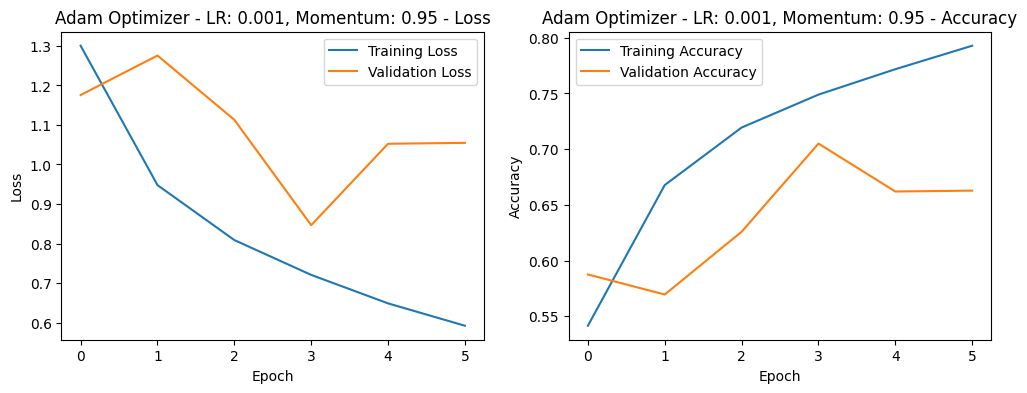

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=momentum)
model = build_model(activation_function='elu', optimizer=adam, dataset='cifar')
history = model.fit(x_train_cifar, y_train_cifar, epochs=6, validation_data=(x_test_cifar, y_test_cifar))

title = f'Adam Optimizer - LR: {learning_rate}, Momentum: {momentum}'
plot_history(history, title=title)

1/1 [==============================] - 0s 23ms/step


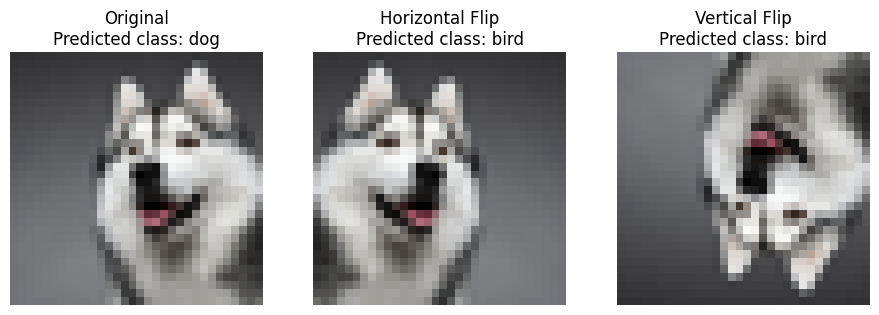

In [ ]:
import requests
from PIL import Image
from io import BytesIO

# Function to apply horizontal and vertical flip to an image
def apply_flips(image):
    image_horizontal = tf.image.flip_left_right(image)
    image_vertical = tf.image.flip_up_down(image)
    return image_horizontal, image_vertical

image_url = "https://pbs.twimg.com/profile_images/1016374194764951552/czTfF94-_400x400.jpg"

response = requests.get(image_url)

if response.status_code == 200:
    image = Image.open(BytesIO(response.content))
    image = image.resize((32, 32))
    original_image = np.array(image)
    original_image = original_image / 255.0

    # Apply flips
    image_horizontal_flip, image_vertical_flip = apply_flips(original_image)

    # Make predictions for the original and flipped images
    predictions_original = model.predict(original_image[tf.newaxis, ...])
    predictions_horizontal_flip = model.predict(image_horizontal_flip[tf.newaxis, ...])
    predictions_vertical_flip = model.predict(image_vertical_flip[tf.newaxis, ...])

    # Get predicted classes
    predicted_class_original = tf.argmax(predictions_original, axis=1)
    predicted_class_horizontal_flip = tf.argmax(predictions_horizontal_flip, axis=1)
    predicted_class_vertical_flip = tf.argmax(predictions_vertical_flip, axis=1)

    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    # Display the original image
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 4, 1)
    plt.imshow(original_image)
    plt.title(f"Original\nPredicted class: {class_names[predicted_class_original[0]]}")
    plt.axis('off')

    # Display the horizontal flip
    plt.subplot(1, 4, 2)
    plt.imshow(image_horizontal_flip)
    plt.title(f"Horizontal Flip\nPredicted class: {class_names[predicted_class_horizontal_flip[0]]}")
    plt.axis('off')

    # Display the vertical flip
    plt.subplot(1, 4, 3)
    plt.imshow(image_vertical_flip)
    plt.title(f"Vertical Flip\nPredicted class: {class_names[predicted_class_vertical_flip[0]]}")
    plt.axis('off')

    plt.show()

else:
    print("Failed to download the image.")


Training the model on the MNIST dataset

Epoch 1/6
1875/1875 [==============================] - 85s 44ms/step - loss: 0.1074 - accuracy: 0.9675 - val_loss: 0.1045 - val_accuracy: 0.9641
Epoch 2/6
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.0356 - val_accuracy: 0.9893
Epoch 3/6
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 0.0329 - val_accuracy: 0.9891
Epoch 4/6
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0261 - accuracy: 0.9916 - val_loss: 0.0893 - val_accuracy: 0.9704
Epoch 5/6
1875/1875 [==============================] - 95s 51ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0303 - val_accuracy: 0.9909
Epoch 6/6
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.0279 - val_accuracy: 0.9920


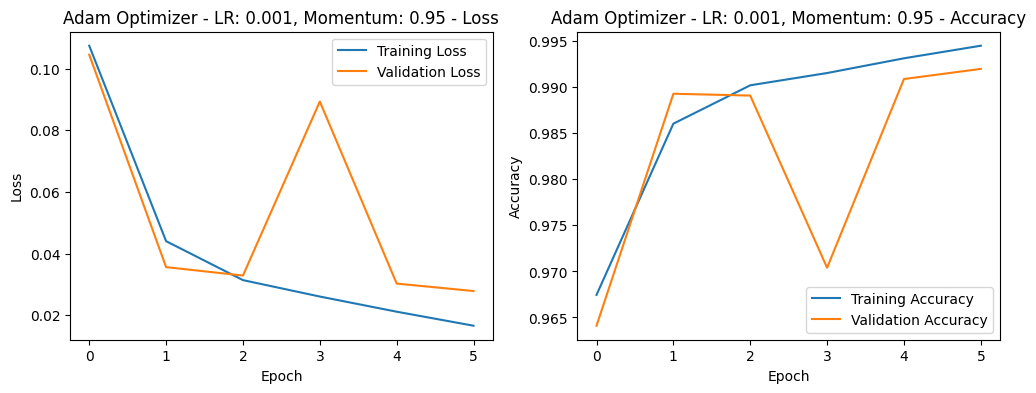

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=momentum)
model = build_model(activation_function='elu', optimizer=adam, dataset='mnist')
history = model.fit(x_train_mnist, y_train_mnist, epochs=6, validation_data=(x_test_mnist, y_test_mnist))

title = f'Adam Optimizer - LR: {learning_rate}, Momentum: {momentum}'
plot_history(history, title=title)

1/1 [==============================] - 0s 158ms/step


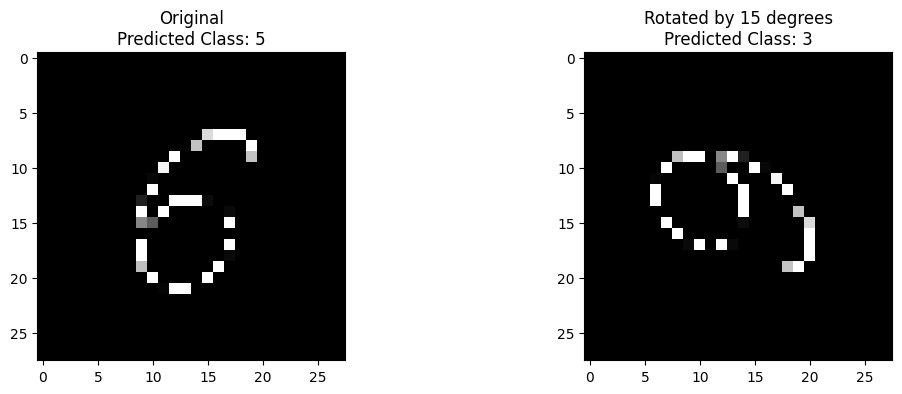

In [ ]:
image_url = "https://i.stack.imgur.com/BvH4E.png"

response = requests.get(image_url)

if response.status_code == 200:
    image = Image.open(BytesIO(response.content))
    image = image.resize((28, 28))
    original_image = np.array(image)
    original_image = original_image / 255.0
    input_array = np.expand_dims(original_image, axis=0)

    # Make a prediction on the original image
    predictions_original = model.predict(input_array)
    predicted_class_original = np.argmax(predictions_original)
    probability_scores_original = predictions_original[0]

    # Add a channel dimension before applying rotation
    input_array_with_channel = np.expand_dims(original_image, axis=-1)

    # Apply rotation augmentation (e.g., rotate by 15 degrees)
    rotation_angle = 15
    rotated_image = tf.image.rot90(input_array_with_channel, k=rotation_angle // 90)
    rotated_image = tf.image.rot90(rotated_image, k=-rotation_angle // 90)

    # Remove the channel dimension after rotation
    rotated_image = tf.squeeze(rotated_image)

    # Make a prediction on the rotated image
    rotated_image_array = tf.expand_dims(rotated_image, axis=0)
    predictions_rotated = model.predict(rotated_image_array)
    predicted_class_rotated = np.argmax(predictions_rotated)
    probability_scores_rotated = predictions_rotated[0]

    # Display the original and rotated images, along with results
    plt.figure(figsize=(20, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(input_array[0, :, :], cmap='gray')
    plt.title(f'Original\nPredicted Class: {predicted_class_original}')

    plt.subplot(1, 3, 2)
    plt.imshow(rotated_image, cmap='gray')
    plt.title(f'Rotated by {rotation_angle} degrees\nPredicted Class: {predicted_class_rotated}')

    plt.show()
